In [1]:
import pandas as pd
import pyodbc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=AZTRIP2\\SQLEXPRESS;"  
    "DATABASE=OLP_Engagement_Analytics;"
    "Trusted_Connection=yes;"
)


users_df = pd.read_sql("SELECT user_id, gender, country, device, subscription_type FROM Users", conn)
enrollments_df = pd.read_sql("SELECT user_id, final_grade, certificate_earned FROM Enrollments", conn)


df = pd.merge(users_df, enrollments_df, on="user_id")


cat_cols = ["gender", "country", "device", "subscription_type"]
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


X = df.drop(["certificate_earned", "user_id"], axis=1)
y = df["certificate_earned"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Classification Report:\n", classification_report(y_test, y_pred))


C:\Users\user\AppData\Local\Temp\ipykernel_15320\2034724973.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  users_df = pd.read_sql("SELECT user_id, gender, country, device, subscription_type FROM Users", conn)
C:\Users\user\AppData\Local\Temp\ipykernel_15320\2034724973.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  enrollments_df = pd.read_sql("SELECT user_id, final_grade, certificate_earned FROM Enrollments", conn)


 Accuracy: 0.7608333333333334
 Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.85      0.84       878
        True       0.56      0.51      0.53       322

    accuracy                           0.76      1200
   macro avg       0.69      0.68      0.69      1200
weighted avg       0.75      0.76      0.76      1200



C:\Users\user\AppData\Local\Temp\ipykernel_15320\3519925860.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  users_df = pd.read_sql("SELECT user_id, gender, country, device, subscription_type FROM Users", conn)
C:\Users\user\AppData\Local\Temp\ipykernel_15320\3519925860.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  enrollments_df = pd.read_sql("SELECT user_id, final_grade, certificate_earned FROM Enrollments", conn)


 Accuracy: 0.7675
 Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.86      0.84       878
        True       0.57      0.52      0.54       322

    accuracy                           0.77      1200
   macro avg       0.70      0.69      0.69      1200
weighted avg       0.76      0.77      0.76      1200



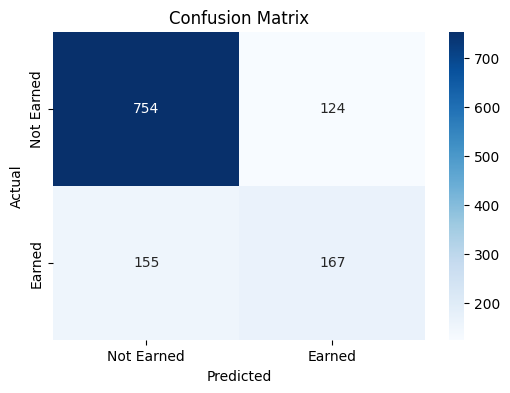

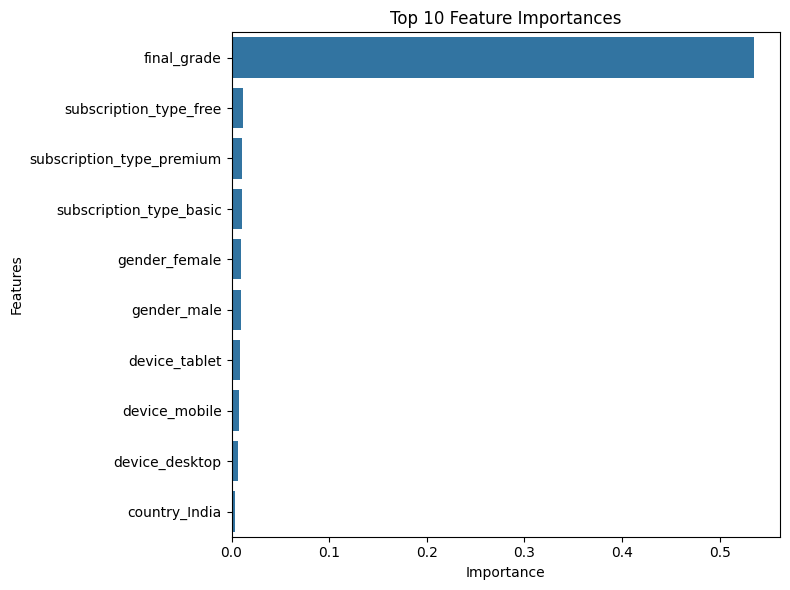

In [2]:
import pandas as pd
import pyodbc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=AZTRIP2\\SQLEXPRESS;"
    "DATABASE=OLP_Engagement_Analytics;"
    "Trusted_Connection=yes;"
)


users_df = pd.read_sql("SELECT user_id, gender, country, device, subscription_type FROM Users", conn)
enrollments_df = pd.read_sql("SELECT user_id, final_grade, certificate_earned FROM Enrollments", conn)


df = pd.merge(users_df, enrollments_df, on='user_id')


y = df["certificate_earned"]
X = df.drop(["certificate_earned", "user_id"], axis=1)


X = pd.get_dummies(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Earned", "Earned"], yticklabels=["Not Earned", "Earned"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature Importances
importances = model.feature_importances_
features = pd.Series(importances, index=X.columns)
features = features.sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=features[:10], y=features.index[:10])
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
